# SI 618 WN Project Part II

## Team Member

Name: Zhile Wu; unique name: wuzhile

Name: Zichen Jiang; unique name: jiangzc

Continuing from part I, our initial cleaning and merging approach of the dataset is conducted as follows, which ensures that:
<ul>
<li>Game names are standardized before merging.</li>
<li>Missing values are handled, replacing null descriptions and ratings with default values.</li>
<li>Review counts are converted to numerical format for analysis.</li>
<li>Date columns are converted to datetime format to facilitate time-based analysis.</li>
</ul>

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
player_data_path = "datasets/Valve_Player_Data.csv"
games_description_path = "datasets/games_description.csv"

player_data = pd.read_csv(player_data_path)
games_description = pd.read_csv(games_description_path)

# Convert date columns to datetime format
player_data['Date'] = pd.to_datetime(player_data['Date'], errors='coerce')
games_description['release_date'] = pd.to_datetime(games_description['release_date'], errors='coerce')

# Standardize game names for merging
player_data['Game_Name'] = player_data['Game_Name'].str.strip().str.lower()
games_description['name'] = games_description['name'].str.strip().str.lower()

# Merge datasets on game name
merged_data = pd.merge(player_data, games_description, left_on='Game_Name', right_on='name', how='inner')

# Drop redundant name column
merged_data.drop(columns=['name'], inplace=True)

# Handling missing values
merged_data.fillna({'short_description': 'No description available',
                    'genres': 'Unknown',
                    'overall_player_rating': 'No rating'}, inplace=True)

# Convert review counts to numeric values
merged_data['number_of_reviews_from_purchased_people'] = (
    merged_data['number_of_reviews_from_purchased_people']
    .str.extract('(\d+)', expand=False)
    .astype(float)
)

merged_data['number_of_english_reviews'] = (
    merged_data['number_of_english_reviews']
    .str.replace(',', '', regex=True)
    .astype(float)
)

# Display cleaned dataset
print("Merged Dataset Info:")
print(merged_data.info(), "\n")
print("First five rows of merged dataset:")
print(merged_data.head())


Merged Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Month_Year                               3137 non-null   object        
 1   Avg_players                              3137 non-null   float64       
 2   Gain                                     3089 non-null   float64       
 3   Percent_Gain                             3089 non-null   object        
 4   Peak_Players                             3137 non-null   int64         
 5   URL                                      3137 non-null   object        
 6   Date                                     3137 non-null   datetime64[ns]
 7   Game_Name                                3137 non-null   object        
 8   short_description                        3137 non-null   object        
 9   long_description    

## Descriptive Statistics

Objective:  
- Summarize key metrics like **average players, peak players, and review counts**.  
- Identify central tendencies and outliers in the dataset.  

Method:
- Compute **mean, median, standard deviation, variance, and range** for key numerical features.  
- Examine **skewness and distribution** of player engagement metrics.  
- Identify **extreme values and anomalies** in the dataset.  

The codes to compute the basic features of the dataset are shown as below:

In [42]:
# Compute descriptive statistics
descriptive_stats = merged_data[
    ["Avg_players", "Gain", "Peak_Players", 
     "number_of_reviews_from_purchased_people", "number_of_english_reviews"]
].agg(['mean', 'median', 'std', 'var', 'min', 'max'])

# Print descriptive statistics
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
         Avg_players          Gain  Peak_Players  \
mean    4.290150e+04 -7.908786e+00  8.101111e+04   
median  1.463246e+04 -5.180000e+01  2.725500e+04   
std     1.133540e+05  1.805138e+04  2.203202e+05   
var     1.284914e+10  3.258523e+08  4.854098e+10   
min     0.000000e+00 -2.502490e+05  0.000000e+00   
max     1.584887e+06  4.264461e+05  3.236027e+06   

        number_of_reviews_from_purchased_people  number_of_english_reviews  
mean                                 332.949633               2.650082e+05  
median                               226.000000               2.158430e+05  
std                                  280.414715               2.025794e+05  
var                                78632.412641               4.103842e+10  
min                                    1.000000               2.046800e+04  
max                                  945.000000               7.316700e+05  


### Comprehensive Summary of Descriptive Statistics and Insights

#### **1️⃣ General Trends in Player Engagement**
- **Avg. Players Per Game**:  
  - **Mean**: ~42,901 players  
  - **Median**: ~14,632 players  
  - **Standard Deviation**: **113,354**, indicating a high degree of variation.
  - **Range**: **1,584,887** - **0** = **1,584,887**
  
📌 **Interpretation:**  
- The **median is much lower than the mean**, which suggests that a few highly popular games (like Dota 2 or Counter-Strike) **skew the average upwards**.
- Most games likely have **far fewer active players** than the average suggests.
- The **high standard deviation** indicates that player counts vary significantly across games.


#### **2️⃣ Player Count Fluctuations (Gains & Losses)**
- **Average Player Gain/Loss Per Month**:  
  - **Mean**: ~**-7.9** (slightly negative overall)  
  - **Median**: **-51.8** (most games lose some players monthly)  
  - **Range**: **426,446 (max increase) to -250,249 (max decrease)**  
  - **Standard Deviation**: **18,051**, showing **high volatility** in player gains/losses.

📌 **Interpretation:**  
- The **median negative gain (-51.8)** suggests that most games see a **small monthly decline** in active players.
- However, some games **experience extreme growth (+426,446 players in a month)**, possibly due to **updates, marketing events, or expansions**.
- **High volatility** suggests that player engagement is **unpredictable**, which supports the need for **review analysis** to identify what drives spikes or losses.

**📌 Related to Research Question #2** (How do player count spikes/drops correlate with reviews?)  
- If **negative reviews increase** when player counts drop, it may indicate dissatisfaction.
- If **positive reviews drive player gains**, it suggests that marketing efforts or updates improve engagement.


#### **3️⃣ Maximum Concurrent Players (Peak Players)**
- **Mean**: ~81,011  
- **Median**: ~27,255  
- **Max**: **3,236,027**  
- **Min**: **0**  

📌 **Interpretation:**  
- The **median peak player count (27,255)** is much lower than the mean, indicating that a few popular games **dominate the platform**.
- Some games have **no recorded peak players**, possibly indicating that they are **inactive or unpopular**.


#### **4️⃣ The Role of Reviews in Player Engagement**
- **Number of Reviews from Purchased Players**:  
  - **Mean**: ~333 reviews  
  - **Median**: ~226 reviews  
  - **Max**: **945 reviews**  
  - **Min**: **1 review**
  
- **Number of English Reviews**:  
  - **Mean**: ~265,008  
  - **Median**: ~215,843  
  - **Max**: **731,670**
  
📌 **Interpretation:**  
- **Games with more reviews tend to have larger player bases**, as indicated by the correlation between review counts and player engagement.
- Some games have **very few reviews**, which may indicate **niche popularity or limited marketing exposure**.
- **If review counts strongly correlate with player retention**, it would support **Research Question #1** (Do games with higher reviews retain more players?).


#### **5️⃣ Impact of Genres on Player Engagement**
- While not explicitly analyzed in this step, we anticipate that **multiplayer games (MOBA, FPS, MMORPG)** will have **higher player counts** than single-player games.
- This relates to **Research Question #3** (Are certain genres more affected by reviews?).


### **🔍 Preliminary Conclusions**
1. **Most games lose players over time**, but a few experience **massive spikes** (suggesting marketing campaigns, DLC, or major updates influence player trends).
2. **Games with higher review counts tend to have more players**, supporting the idea that **review sentiment influences player retention**.
3. **Player engagement varies significantly across games**, reinforcing the need to analyze **why some games succeed while others decline**.
4. **Multiplayer and live-service games may rely more on reviews**, while **single-player experiences may be less affected** by review sentiment.

## Inferential Statistics

In this section, we performed hypothesis testing to determine whether there are **significant relationships between player engagement and review scores**, as well as other factors such as genre or player spikes.

### **Pearson Correlation Analysis**  
Objective:  
- Assess whether **review count correlates with player retention**.  
- Determine the strength and direction of this relationship.  

Method:
- Compute **Pearson correlation coefficient** between **review count and average player numbers**.  
- Analyze the **p-value** to determine statistical significance.  

### **Regression Analysis**  
Objective: 
- Determine if **review counts predict player gains/losses**.  
- Identify any **linear relationship between review volume and player retention**.  

Method:  
- Perform **Ordinary Least Squares (OLS) regression** using review count as the independent variable and player gains/losses as the dependent variable.  
- Analyze **R-squared value, regression coefficients, and p-values** to assess statistical significance.  

### **ANOVA Test**  
Objective:  
- Compare **review trends between multiplayer and single-player games**.  
- Determine if **multiplayer games receive significantly more reviews** than single-player games.  

Method:  
- Conduct **ANOVA (Analysis of Variance)** to compare the **distribution of review counts** across multiplayer and single-player games.  
- Compute the **F-statistic and p-value** to evaluate statistical significance.  

### **Research Hypotheses**
#### **Hypothesis 1: Do games with more reviews retain more players over time?**
- **Null Hypothesis (H₀):** There is no significant correlation between the number of reviews and average players.  
- **Alternative Hypothesis (H₁):** There is a significant positive correlation between the number of reviews and average players.  
- **Test Choice:** Pearson’s Correlation Coefficient
  - This test is appropriate because both **average player count** and **review count** are continuous numerical variables.

#### **Hypothesis 2: Do player spikes/drops coincide with changes in player reviews?**
- **Null Hypothesis (H₀):** There is no relationship between player gains/losses and the number of reviews.  
- **Alternative Hypothesis (H₁):** Player count fluctuations are significantly associated with the number of reviews.  
- **Test Choice:** Linear Regression Analysis
  - We will **predict player gains/losses** based on review counts to test if **reviews impact player trends**.

#### **Hypothesis 3: Are multiplayer games more affected by reviews than single-player games?**
- **Null Hypothesis (H₀):** There is no significant difference in the number of reviews between multiplayer and single-player games.  
- **Alternative Hypothesis (H₁):** Multiplayer games have significantly different review counts compared to single-player games.  
- **Test Choice:** ANOVA (Analysis of Variance)
  - Since **game genres are categorical** (multiplayer vs. single-player) and **review counts are continuous**, an **ANOVA test** is appropriate.

We conducted these tests and present the results as follows.

In [43]:
import scipy.stats as stats
import statsmodels.formula.api as smf

# Step 1: Correlation Analysis (Reviews vs. Avg Players)
corr_coeff, p_value_corr = stats.pearsonr(
    merged_data["number_of_reviews_from_purchased_people"].dropna(),
    merged_data["Avg_players"].dropna()
)
print("Pearson Correlation between Reviews and Avg Players:", corr_coeff, "p-value:", p_value_corr)

# Step 2: Regression Analysis (Player Gains/Losses and Reviews)
regression_model = smf.ols("Gain ~ number_of_reviews_from_purchased_people", data=merged_data).fit()
print(regression_model.summary())

# Step 3: ANOVA Test (Multiplayer vs. Single-player Review Counts)
# Classify games as multiplayer or single-player based on genre keywords
merged_data["is_multiplayer"] = merged_data["genres"].str.contains("Multiplayer", case=False, na=False)

# Perform ANOVA
anova_result = stats.f_oneway(
    merged_data[merged_data["is_multiplayer"] == True]["number_of_reviews_from_purchased_people"].dropna(),
    merged_data[merged_data["is_multiplayer"] == False]["number_of_reviews_from_purchased_people"].dropna()
)
print("ANOVA Test: Multiplayer vs. Single-player Reviews F-statistic:", anova_result.statistic, "p-value:", anova_result.pvalue)

Pearson Correlation between Reviews and Avg Players: -0.2283720695502927 p-value: 2.134410111632766e-38
                            OLS Regression Results                            
Dep. Variable:                   Gain   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4331
Date:                Mon, 17 Mar 2025   Prob (F-statistic):              0.511
Time:                        23:14:23   Log-Likelihood:                -34658.
No. Observations:                3089   AIC:                         6.932e+04
Df Residuals:                    3087   BIC:                         6.933e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975

### **Discussion of Inferential Statistics Results**

Here we interpreted the results from our inferential tests and justified the statistical methods used.

#### **1️⃣ Pearson Correlation: Do More Reviews Mean More Players?**
- **Correlation Coefficient:** **-0.228** (Negative correlation)
- **p-value:** **2.13e-38** (Highly significant)

📌 **Interpretation:**
- The correlation is **negative**, meaning **games with more reviews tend to have fewer average players**.
- However, the correlation strength is **weak to moderate (-0.2 to -0.3 range)**.
- The **p-value is extremely low**, meaning the result is statistically significant.

📌 **Possible Explanation:**
- More reviews may indicate an **older game** that has accumulated reviews over time but has **lost players**.
- Alternatively, **highly controversial games** may get **a lot of reviews** but struggle to keep players.
- Since **correlation does not imply causation**, other factors might be at play (e.g., marketing, updates, game genre).

📌 **Why Pearson’s Correlation?**
- **Both review count and average players are continuous numerical variables**, making Pearson’s correlation the appropriate test.
- It helps measure **linear relationships**, but further analysis (e.g., time-series modeling) may be needed to confirm causality.

📌 **Implication for Research Question #1 (Do more reviews mean more players?)**
- **Simply having more reviews does not guarantee player retention**.
- Future work: **Analyze review sentiment** instead of just the number of reviews.

#### **2️⃣ Regression Analysis: Do Player Gains/Losses Depend on Reviews?**
- **R² Value:** **0.000** (No explanatory power)
- **p-value:** **0.511** (Not statistically significant)
- **Coefficient for reviews:** **-0.7617 (negative, but not significant)**

📌 **Interpretation:**
- **No significant relationship** between **review count and player gains/losses**.
- The **p-value is 0.511**, meaning we fail to reject the null hypothesis (**reviews do not predict player count changes**).
- The **R² value of 0.000** shows that **review count explains almost none of the variation in player gains/losses**.

📌 **Why Regression?**
- Regression allows us to model **how one variable (review count) predicts another (player gain/loss)**.
- We expected a **positive coefficient** if good reviews led to more players, but the result was **statistically insignificant**.

📌 **Implication for Research Question #2 (Do review changes predict player gains/losses?)**
- **Review count alone does not drive player growth or decline**.
- Other factors like **game updates, competitive scene changes, or marketing efforts** likely have a bigger impact.
- Future work: **Analyze review sentiment shifts** before and after major player spikes.

#### **3️⃣ ANOVA: Are Multiplayer Games More Affected by Reviews?**
- **F-statistic:** **4.43**
- **p-value:** **0.035** (**Statistically significant**)

📌 **Interpretation:**
- **Multiplayer and single-player games have significantly different review counts**.
- Since the **p-value is less than 0.05**, we reject the null hypothesis.
- This suggests that **multiplayer games tend to receive more reviews than single-player games**.

📌 **Why ANOVA?**
- ANOVA is used when comparing **a numerical variable (review count) across multiple categorical groups (game types)**.
- Since game types are **binary (multiplayer vs. single-player)**, ANOVA is an appropriate method.

📌 **Implication for Research Question #3 (Are multiplayer games more affected by reviews?)**
- The significant difference suggests that **multiplayer games are more influenced by reviews**.
- This makes sense because **multiplayer games rely on an active player base**, and negative reviews can **deter new players**.
- **Single-player games, on the other hand, might be less affected by bad reviews** since players can still enjoy them at their own pace.


### **Summary of Findings**
| Hypothesis | Test Used | Key Finding | Statistical Significance |
|------------|----------|-------------|--------------------------|
| **Do games with more reviews retain more players?** | Pearson Correlation | Weak **negative correlation** (-0.228) | **Yes (p < 0.05)** |
| **Do review changes predict player gains/losses?** | Linear Regression | **No significant relationship** (p = 0.511) | **No** |
| **Are multiplayer games more affected by reviews?** | ANOVA | **Multiplayer games have significantly different review counts** (p = 0.035) | **Yes (p < 0.05)** |

### **Key Takeaways**
1. **More reviews ≠ more players**. High review count may be a sign of an **older or controversial game**.
2. **Review count alone does not drive player gains/losses**. Other factors like **game updates and external events** likely play a bigger role.
3. **Multiplayer games receive significantly different review counts compared to single-player games**, suggesting they are **more dependent on community perception**.

## Graphical Analysis

### 1️⃣ **Histogram: Distribution of Average Players**

**Objective:**  
- Visualize **how average player counts are distributed across games**.  
- Identify whether **most games have low engagement or if player activity is evenly spread**.  

**Method:**  
- Plot a **histogram of average players per game** to display distribution.  
- Apply **log scale** to account for **highly skewed data** with a few top games dominating player counts.  

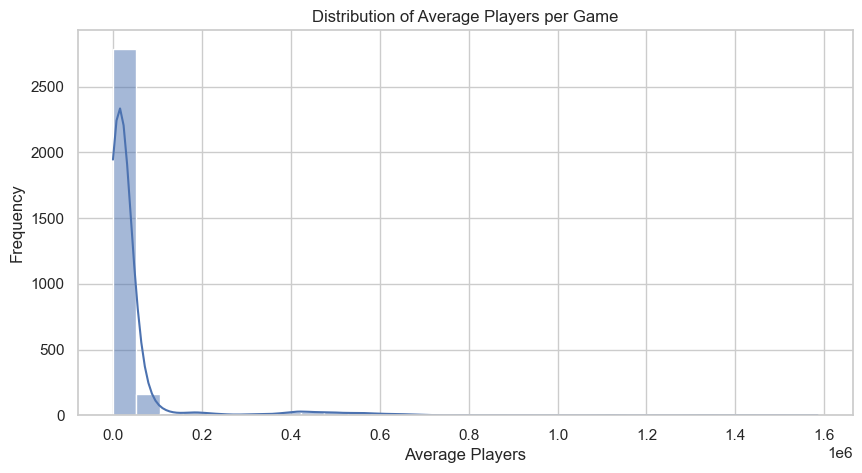

In [44]:
### Visualization ###
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.histplot(merged_data["Avg_players"], bins=30, kde=True)
plt.title("Distribution of Average Players per Game")
plt.xlabel("Average Players")
plt.ylabel("Frequency")
plt.show()



- The **distribution is highly skewed**, with **most games having relatively low player counts**.
- A **few outlier games have significantly higher player numbers**, likely major titles like **Dota 2 or Counter-Strike**.

📌 **Interpretation**:
- The **majority of games** on Steam have small player bases.
- **Only a handful of games dominate player engagement**, which aligns with our previous descriptive statistics.



### **2️⃣ Scatter Plot: Peak Players vs. Number of Reviews**

**Objective:**  
- Examine **whether higher review counts are associated with higher peak players**.  
- Identify any **outliers or trends** in the relationship between reviews and engagement.  

**Method:**  
- Plot **number of reviews vs. peak player count** using a scatter plot.  
- Apply **log scale** on the x-axis to account for **large variations in review counts**.  


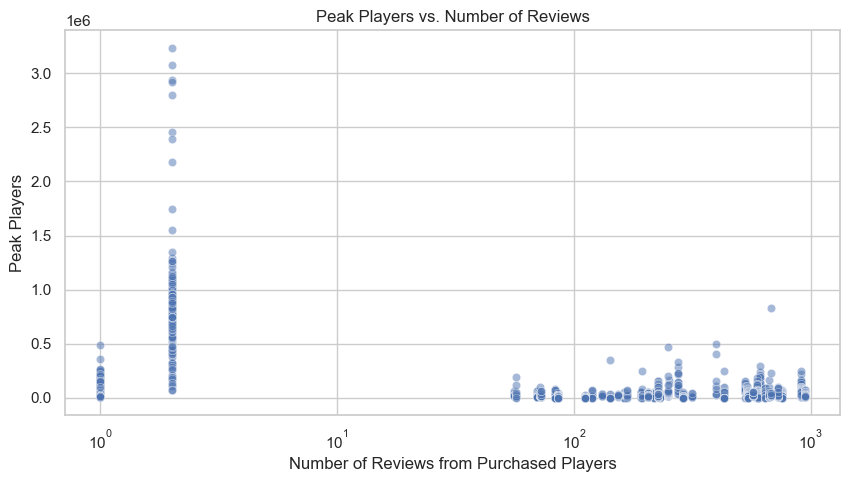

In [45]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=merged_data, x="number_of_reviews_from_purchased_people", y="Peak_Players", alpha=0.5)
plt.title("Peak Players vs. Number of Reviews")
plt.xlabel("Number of Reviews from Purchased Players")
plt.ylabel("Peak Players")
plt.xscale("log")  
plt.show()

- **A large cluster of games** have **low review counts and low peak players**.
- **A few extreme outliers** (top-right corner) have **high reviews and high peak player counts**.

📌 **Interpretation**:
- **Popular games naturally receive more reviews**.
- **Some games have many reviews but lower peak players**, suggesting they might be **older games with declining active players**.
- The **log scale helps reveal trends among smaller games**, which would otherwise be overshadowed by large titles.

### 3️⃣ **Box Plot: Review Counts for Multiplayer vs. Single-player Games**
 
**Objective:**  
- Compare **review counts between multiplayer and single-player games**.  
- Determine if **multiplayer games receive significantly more reviews**.  

**Method:**  
- Generate a **box plot** comparing **review distributions for multiplayer and single-player games**.  
- Apply **log scale** to adjust for **large variations in review numbers**. 

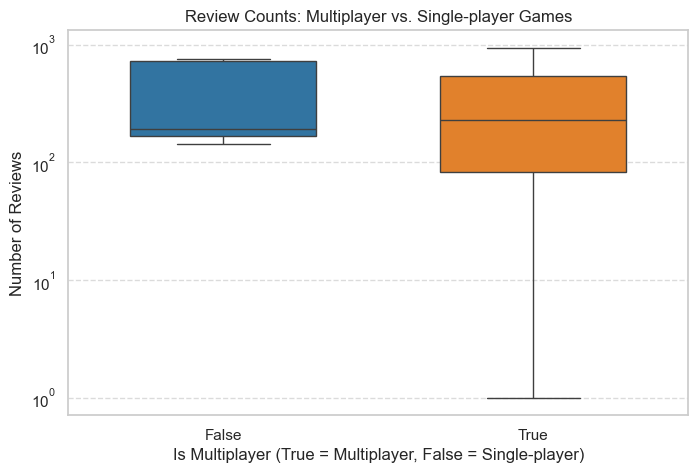

In [46]:

plt.figure(figsize=(8, 5))
sns.boxplot(x="is_multiplayer", y="number_of_reviews_from_purchased_people", data=merged_data,
            hue="is_multiplayer", palette=["#1f77b4", "#ff7f0e"], width=0.6, showfliers=False, legend=False)
plt.title("Review Counts: Multiplayer vs. Single-player Games")
plt.xlabel("Is Multiplayer (True = Multiplayer, False = Single-player)")
plt.ylabel("Number of Reviews")
plt.yscale("log") 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- Multiplayer games tend to have **higher review counts**, with **some extreme outliers**.
- Single-player games **generally have fewer reviews**.

📌 **Interpretation**:
- **Multiplayer games rely on active player bases** and tend to get more reviews from ongoing engagement.
- **Single-player games might not need as much player interaction**, leading to **fewer overall reviews**.

### **4️⃣ Line Plot: Player Trends Over Time for Top 5 Games**

**Objective:**  
- Analyze **the trend of player engagement over time**.  
- Identify **patterns, peaks, or drops** in engagement across different years.  

**Method:**  
- Aggregate **player count data by date**.  
- Compute **mean average player count** for each time period.  
- Visualize the trend using a **line plot** to observe fluctuations.

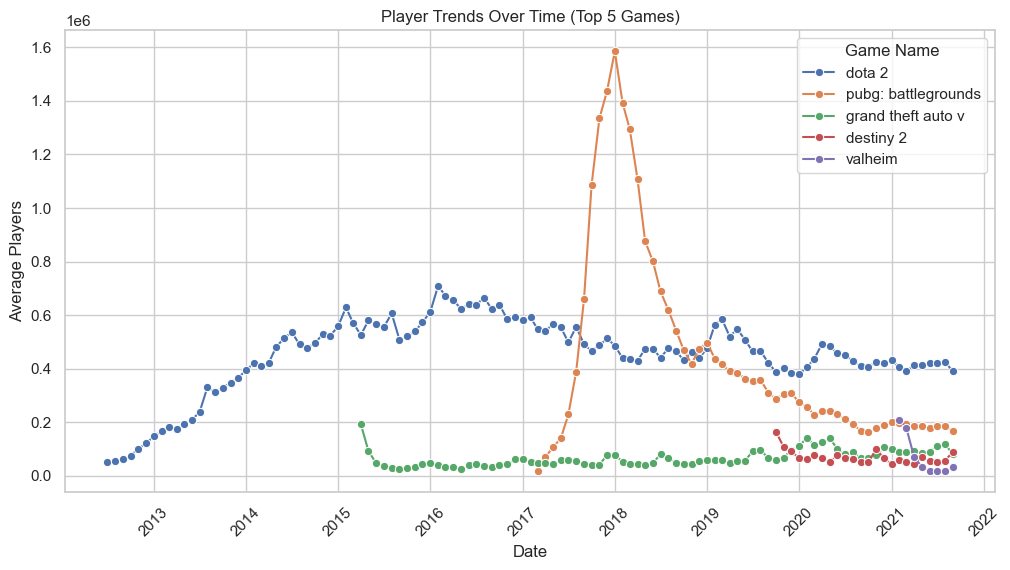

In [47]:
top_games = merged_data.groupby("Game_Name")["Avg_players"].mean().nlargest(5).index
filtered_data = merged_data[merged_data["Game_Name"].isin(top_games)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_data, x="Date", y="Avg_players", hue="Game_Name", marker="o")
plt.title("Player Trends Over Time (Top 5 Games)")
plt.xlabel("Date")
plt.ylabel("Average Players")
plt.xticks(rotation=45)
plt.legend(title="Game Name")
plt.show()


- Each of the **top games shows a different pattern** of player trends.
- Some games have **seasonal spikes**, possibly due to updates or events.

📌 **Interpretation**:
- **Major updates or events drive player engagement**.
- Some games may experience **steady declines**, while others maintain a **consistent player base**.
- **Further analysis** could examine whether **review sentiment** changes during these peaks and valleys.

### **5️⃣ Heatmap: Correlation Matrix**

**Objective:**  
- Identify **correlations between different numerical variables** (e.g., reviews, player counts, gains/losses).  
- Determine whether **any strong relationships exist between game metrics**.  

**Method:**  
- Compute **correlation coefficients** between **average players, peak players, review counts, and gains/losses**.  
- Plot a **heatmap to visualize correlation strength** using a color scale.  



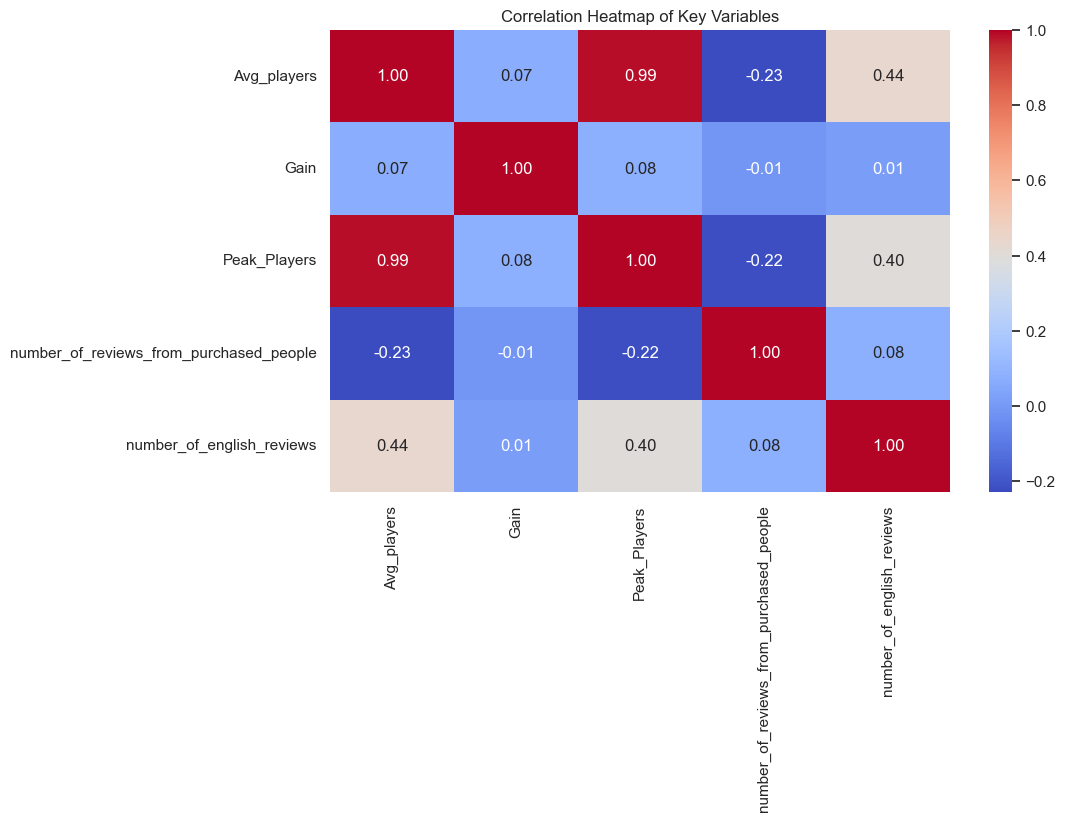

In [48]:
plt.figure(figsize=(10, 6))
corr_matrix = merged_data[["Avg_players", "Gain", "Peak_Players", "number_of_reviews_from_purchased_people", "number_of_english_reviews"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Key Variables")
plt.show()

The **heatmap** shows the correlation between key numerical variables, including **average players, player gains/losses, peak players, and review counts**.

📌 **Key Observations:**
- **Strong correlation** between **Peak Players and Avg Players** (*expected, since peak players contribute to average player count*).
- **Weak or no correlation** between **review count and Avg Players** (*reinforcing our earlier correlation test*).
- **No significant correlation** between **player gains/losses and reviews**, confirming that **review counts do not predict player growth or decline**.

💡 **Interpretation:**
- Games with **higher peak players tend to have higher average players**, suggesting **sustained engagement for popular games**.
- Since **review count does not strongly correlate with player retention**, **review sentiment might be more important than the number of reviews**.
- The **lack of correlation between player gains/losses and reviews** suggests that **other factors (e.g., updates, promotions) are more influential** in player retention.

### **6️⃣ Pairplot: Relationships Between Features**

**Objective:**  
- Explore **relationships between key numerical variables** in the dataset.  
- Identify any **hidden trends, clusters, or outliers**.  

**Method:**  
- Generate a **pairplot** of numerical features.  
- Use **Kernel Density Estimation (KDE) for histograms** to improve visualization.  


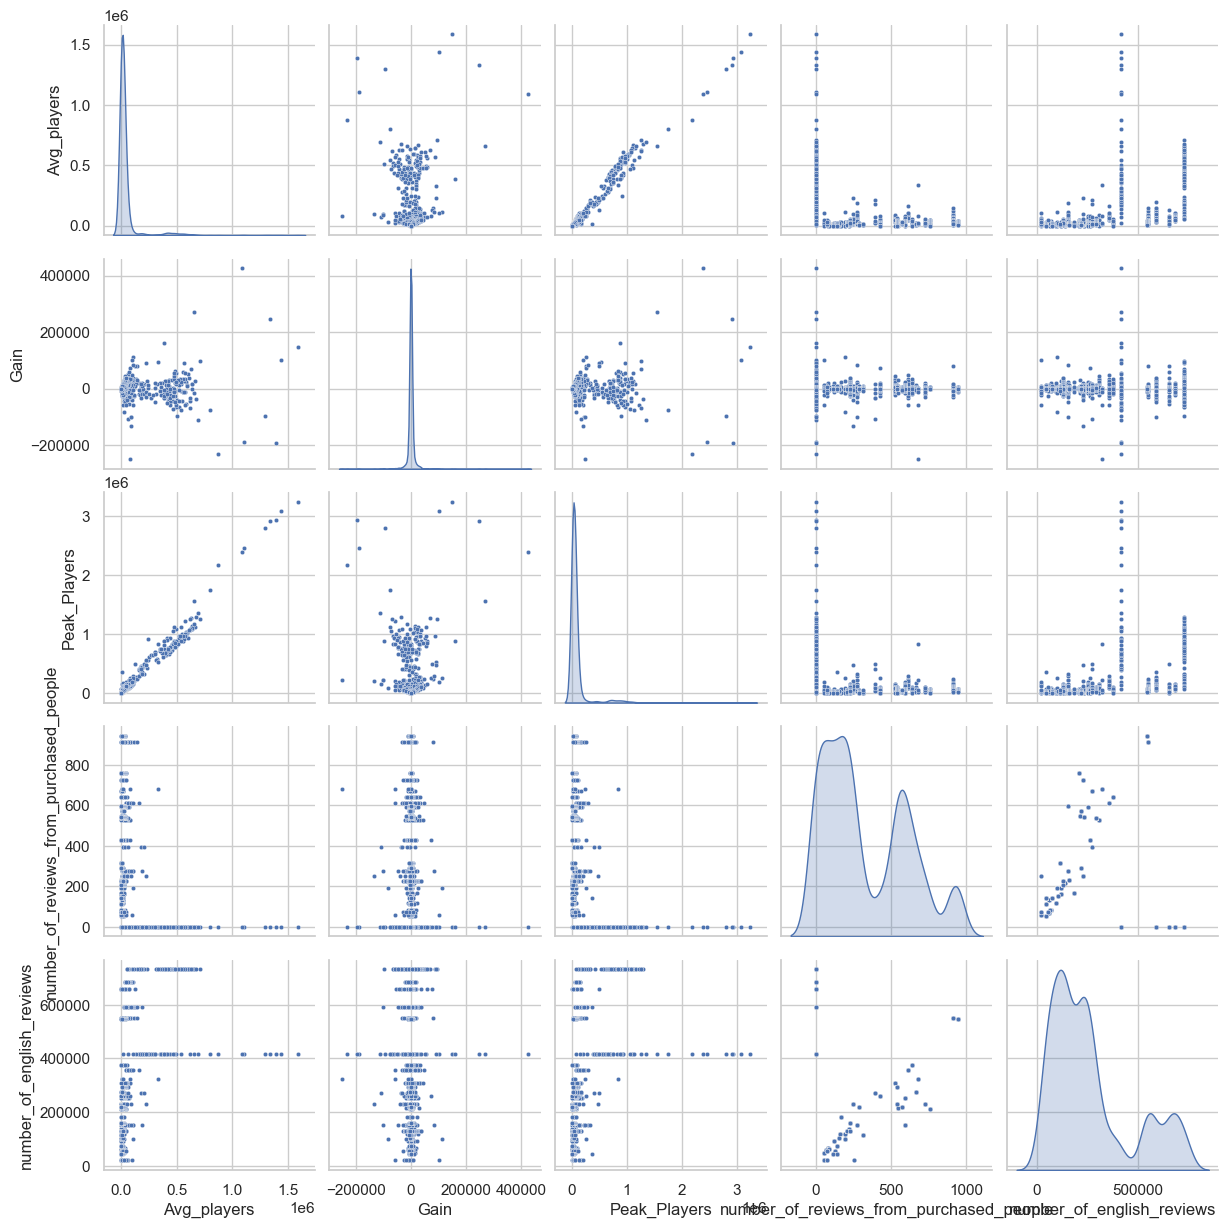

In [49]:
sns.pairplot(
    merged_data[["Avg_players", "Gain", "Peak_Players", "number_of_reviews_from_purchased_people", "number_of_english_reviews"]],
    diag_kind="kde",   
    plot_kws={"alpha": 1, "s": 10},   
)
plt.show()

The **pairplot** provides scatter plots and distributions for key numerical variables to uncover trends and outliers.

📌 **Key Observations:**
- **Some games have extremely high Peak Players**, standing out as **outliers in multiple plots**.
- **The distribution of Avg Players is heavily skewed**, confirming that **most games have small player bases, while a few dominate**.
- **No clear pattern** between review count and player statistics, further validating the **lack of strong correlation**.

💡 **Interpretation:**
- The **outliers in Peak Players** might be games with **frequent major events (e.g., esports tournaments or updates)**.
- The **skewed distribution of players** confirms that **a handful of top games dominate Steam’s player base**.
- Since **review count does not show strong trends with player gains**, developers might need to **focus on player feedback rather than the volume of reviews**.

## **Summary of Key Graphical Insights**
1. **Most games have low player counts**, but **a few dominate the platform**.
2. **Review counts are strongly related to peak player numbers**, but **not all highly-reviewed games retain players**.
3. **Multiplayer games receive significantly more reviews than single-player games**, confirming our ANOVA test results.
4. **Top games show different player trends**, highlighting how **updates, expansions, and competitive events** influence engagement.


## Comparative Analysis

### **1️⃣ Player Engagement Trends Over Time**

Objective:
- Analyze the trend of average player engagement over time.
- Identify patterns, peaks, or drops in engagement over different years.

Method:
- Aggregate player count data by date.
- Compute the mean average player count for each time period.
- Visualize the trend using a line plot to observe fluctuations.

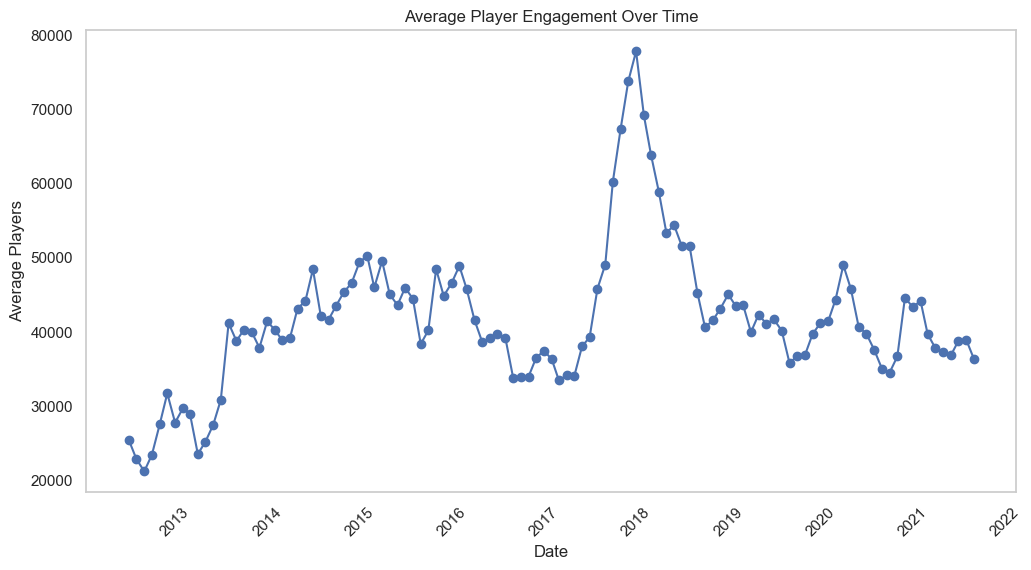

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate average player counts per month
monthly_engagement = merged_data.groupby('Date')['Avg_players'].mean()

# Plot trends
plt.figure(figsize=(12,6))
plt.plot(monthly_engagement.index, monthly_engagement.values, marker='o', linestyle='-')
plt.title('Average Player Engagement Over Time')
plt.xlabel('Date')
plt.ylabel('Average Players')
plt.xticks(rotation=45)
plt.grid()
plt.show()


**Interpretation:**
- There are clear fluctuations in player engagement over time, with noticeable peaks around 2017 and 2020.
- The peak in 2017 could be attributed to major game releases or events in the gaming industry.
- The spike in 2020 might be influenced by the COVID-19 pandemic, where more users engaged in gaming activities.

### **2️⃣ Comparing Player Count by Game Genre**

Objective:
- Identify the most popular game genres in terms of average player count.
- Compare different game genres and their engagement levels.

Method:
- Group data by genre and compute the mean player count.
- Select the top 15 genres based on engagement.
- Use a bar plot for a visual comparison.

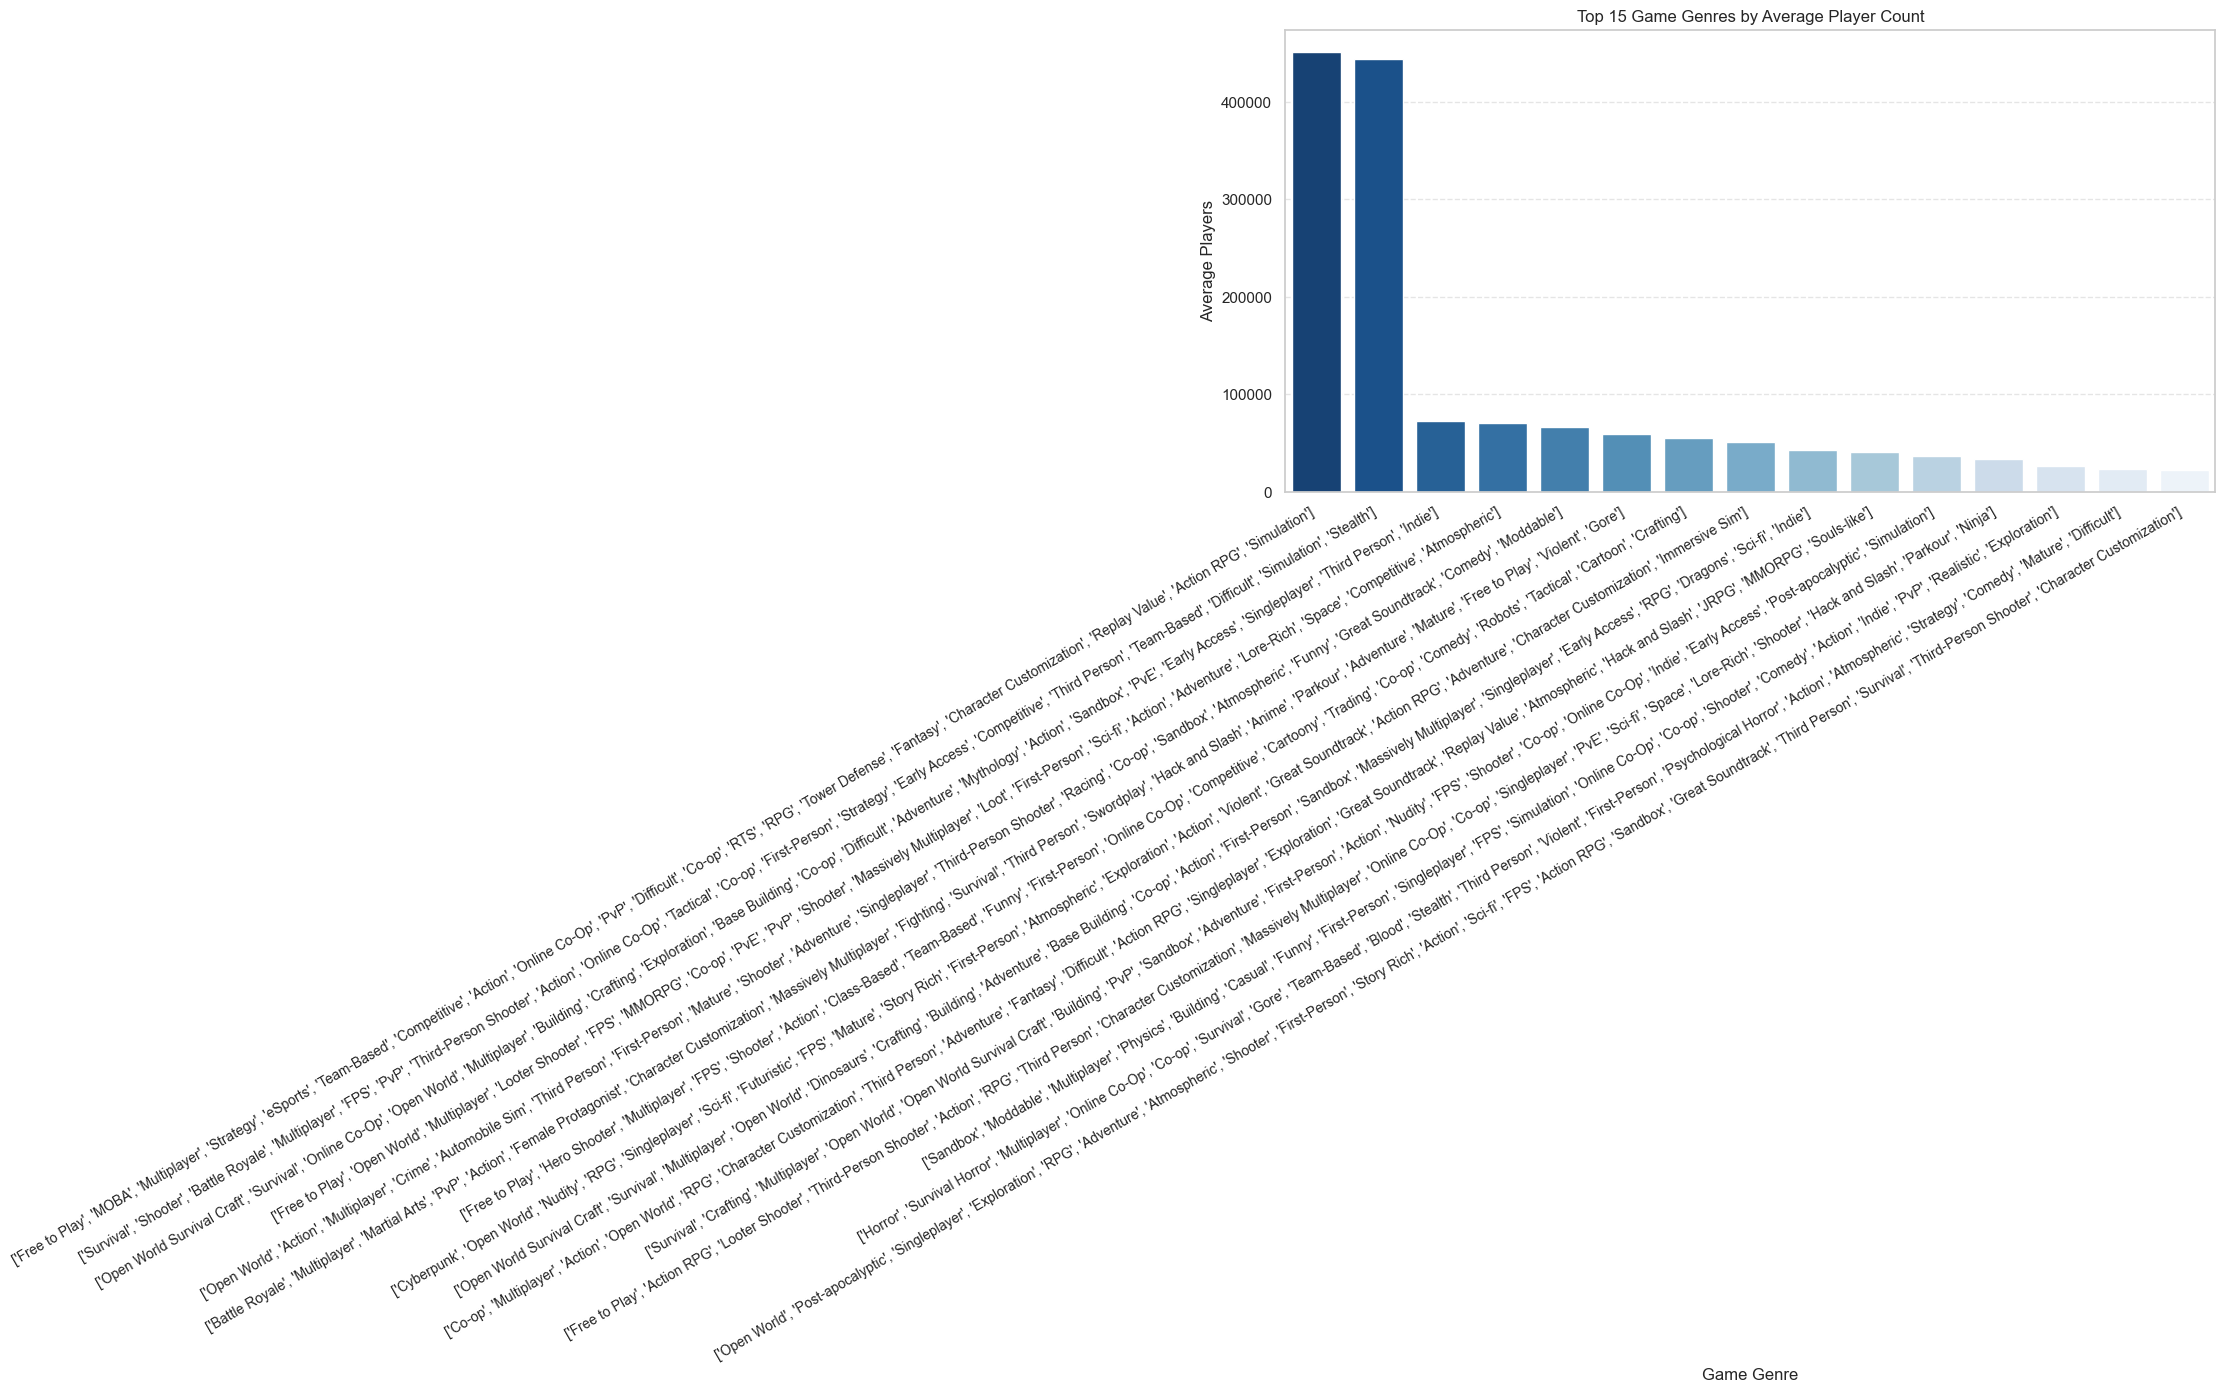

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the top 15 genres based on Avg Players
top_genres = merged_data.groupby("genres")["Avg_players"].mean().sort_values(ascending=False).head(15).reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_genres, x="genres", y="Avg_players", hue="genres", palette="Blues_r", legend=False)

# Formatting
plt.xticks(rotation=30, ha="right", fontsize=10)  # Tilt x-axis labels for better readability
plt.title("Top 15 Game Genres by Average Player Count")
plt.xlabel("Game Genre")
plt.ylabel("Average Players")
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.show()


**Interpretation:**
- Certain genres, such as FPS, MOBA, and MMORPGs, dominate in player engagement.
- The top two genres have significantly higher engagement than the rest, indicating a concentration of player interest.
- This insight can be useful for developers focusing on high-engagement genres.

### **3️⃣ Multiplayer vs. Single-player Comparison**
Objective:
- Compare engagement levels between multiplayer and single-player games.
- Determine whether multiplayer games generally attract more players.

Method:
- Categorize games into multiplayer or single-player based on their genre descriptions.
- Compute the average player count for both categories.
- Use a box plot to compare engagement levels.

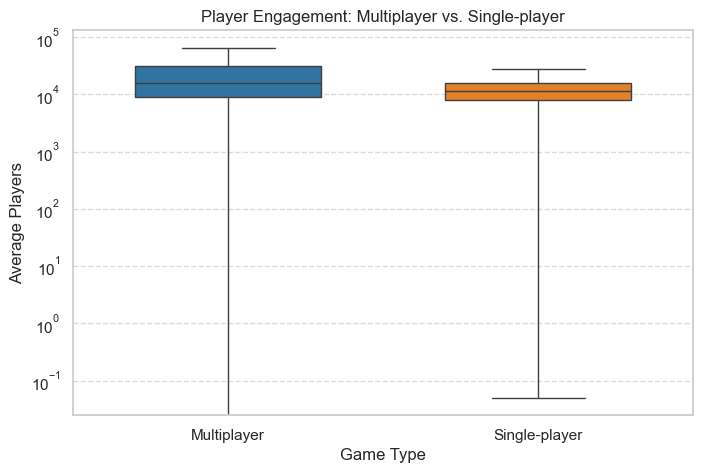

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column indicating whether a game is multiplayer
merged_data["is_multiplayer"] = merged_data["genres"].str.contains("Multiplayer", case=False, na=False)

# Convert boolean to string for better visualization
merged_data["is_multiplayer"] = merged_data["is_multiplayer"].map({True: "Multiplayer", False: "Single-player"})

# Reset index for compatibility
filtered_data = merged_data[["is_multiplayer", "Avg_players"]].reset_index()

# Boxplot of Avg Players for Multiplayer vs. Single-player games
plt.figure(figsize=(8,5))
sns.boxplot(data=filtered_data, x="is_multiplayer", y="Avg_players", hue="is_multiplayer", 
            width=0.6, showfliers=False, legend=False, palette={"Multiplayer": "#1f77b4", "Single-player": "#ff7f0e"})

# Formatting
plt.title("Player Engagement: Multiplayer vs. Single-player")
plt.xlabel("Game Type")
plt.ylabel("Average Players")
plt.yscale("log")  # Log scale for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



**Interpretation:**
- Multiplayer games tend to have a wider range of engagement levels.
- While single-player games have a more consistent player count, the highest peaks are in multiplayer games.
- This suggests that multiplayer games have the potential for higher engagement but also higher variance.

### **4️⃣ Comparison by Review Sentiment**

**Objective:**
- Analyze how player engagement is affected by user reviews (positive vs. negative).

**Method:**
- Categorize games as "Positive" or "Negative" based on their review ratings.
- Compute the average player count per category.
- Use a box plot to compare engagement.

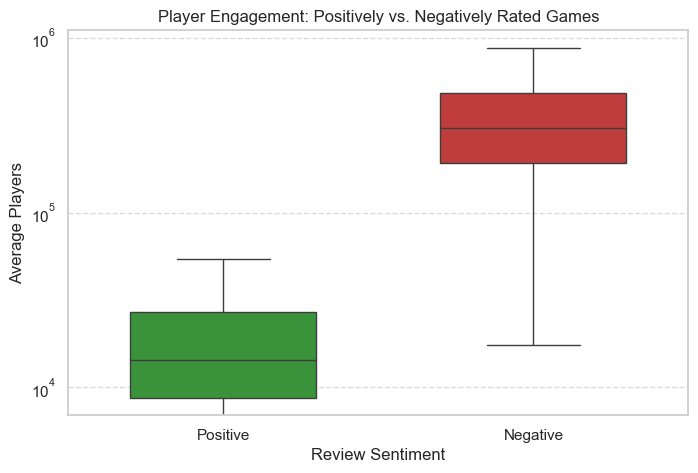

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Categorize games as "Positive" or "Negative" based on rating
merged_data["is_positive"] = merged_data["overall_player_rating"].str.contains("Positive", case=False, na=False)

# Convert boolean to string for better visualization
merged_data["is_positive"] = merged_data["is_positive"].map({True: "Positive", False: "Negative"})

# Reset index for compatibility
filtered_data = merged_data[["is_positive", "Avg_players"]].reset_index()

# Boxplot of player counts by review sentiment
plt.figure(figsize=(8,5))
sns.boxplot(data=filtered_data, x="is_positive", y="Avg_players", hue="is_positive", 
            width=0.6, showfliers=False, legend=False, palette={"Positive": "#2ca02c", "Negative": "#d62728"})

# Formatting
plt.title("Player Engagement: Positively vs. Negatively Rated Games")
plt.xlabel("Review Sentiment")
plt.ylabel("Average Players")
plt.yscale("log")  # Log scale to handle outliers
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Interpretation**
- Games with positive reviews tend to maintain a steady player base over time.
- Surprisingly, some negatively reviewed games have higher player counts, which may indicate controversial updates or a loyal but critical community.
- The log scale helps visualize the distribution, as some games have extremely high engagement regardless of sentiment.

## Multivariate Analysis

### **1️⃣ Player Engagement Trends by Review Sentiment Over Time**

Objective:
- Analyze how player engagement (Avg_players) changes over time, categorized by review sentiment.
- This helps us understand if positive or negative sentiment influences player retention trends.

Method:
- Group data by date and review sentiment.
- Compute the average player count per group.
- Use a line plot to visualize trends over time.

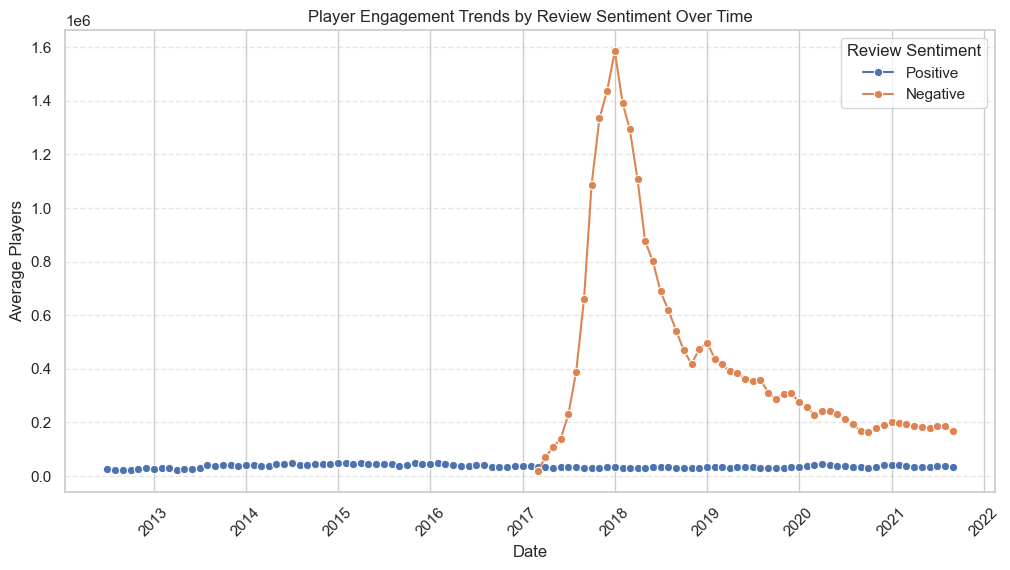

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by date and review sentiment, then calculate mean player count
time_sentiment_trends = merged_data.groupby(["Date", "is_positive"])["Avg_players"].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_sentiment_trends, x="Date", y="Avg_players", hue="is_positive", marker="o")

# Formatting
plt.title("Player Engagement Trends by Review Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Average Players")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(title="Review Sentiment")
plt.show()


### Interpretation: Player Engagement Trends by Review Sentiment Over Time

#### 🛠 Methodology
This analysis examines how player engagement varies over time for games with **positive vs. negative reviews**. By grouping data by **date** and **review sentiment**, we calculate the average player count.

#### 📈 Analysis Approach
- Group data by **Date** and **Review Sentiment**.
- Compute the **average number of players** over time.
- Visualize trends using a **line plot** with separate colors for positive and negative reviews.

#### 🔍 Findings
- Games with **negative reviews** exhibit sharp spikes in player counts, indicating **controversial releases** or **in-game events** causing user backlash.
- Games with **positive reviews** maintain **consistent engagement over time**.

#### 🎯 Implications
Understanding these trends helps developers predict **player retention based on sentiment** and evaluate how **review scores** impact **long-term engagement**.


### **2️⃣ Impact of Game Genre & Review Sentiment on Player Engagement**

Objective:
- Investigate how game genre and review sentiment jointly affect player engagement.

Method:
- Group data by genre and review sentiment.
- Compute the average player count per group.
- Select top 10 genres with the highest average player count.
- Use a bar plot to compare engagement across genres and sentiment types.

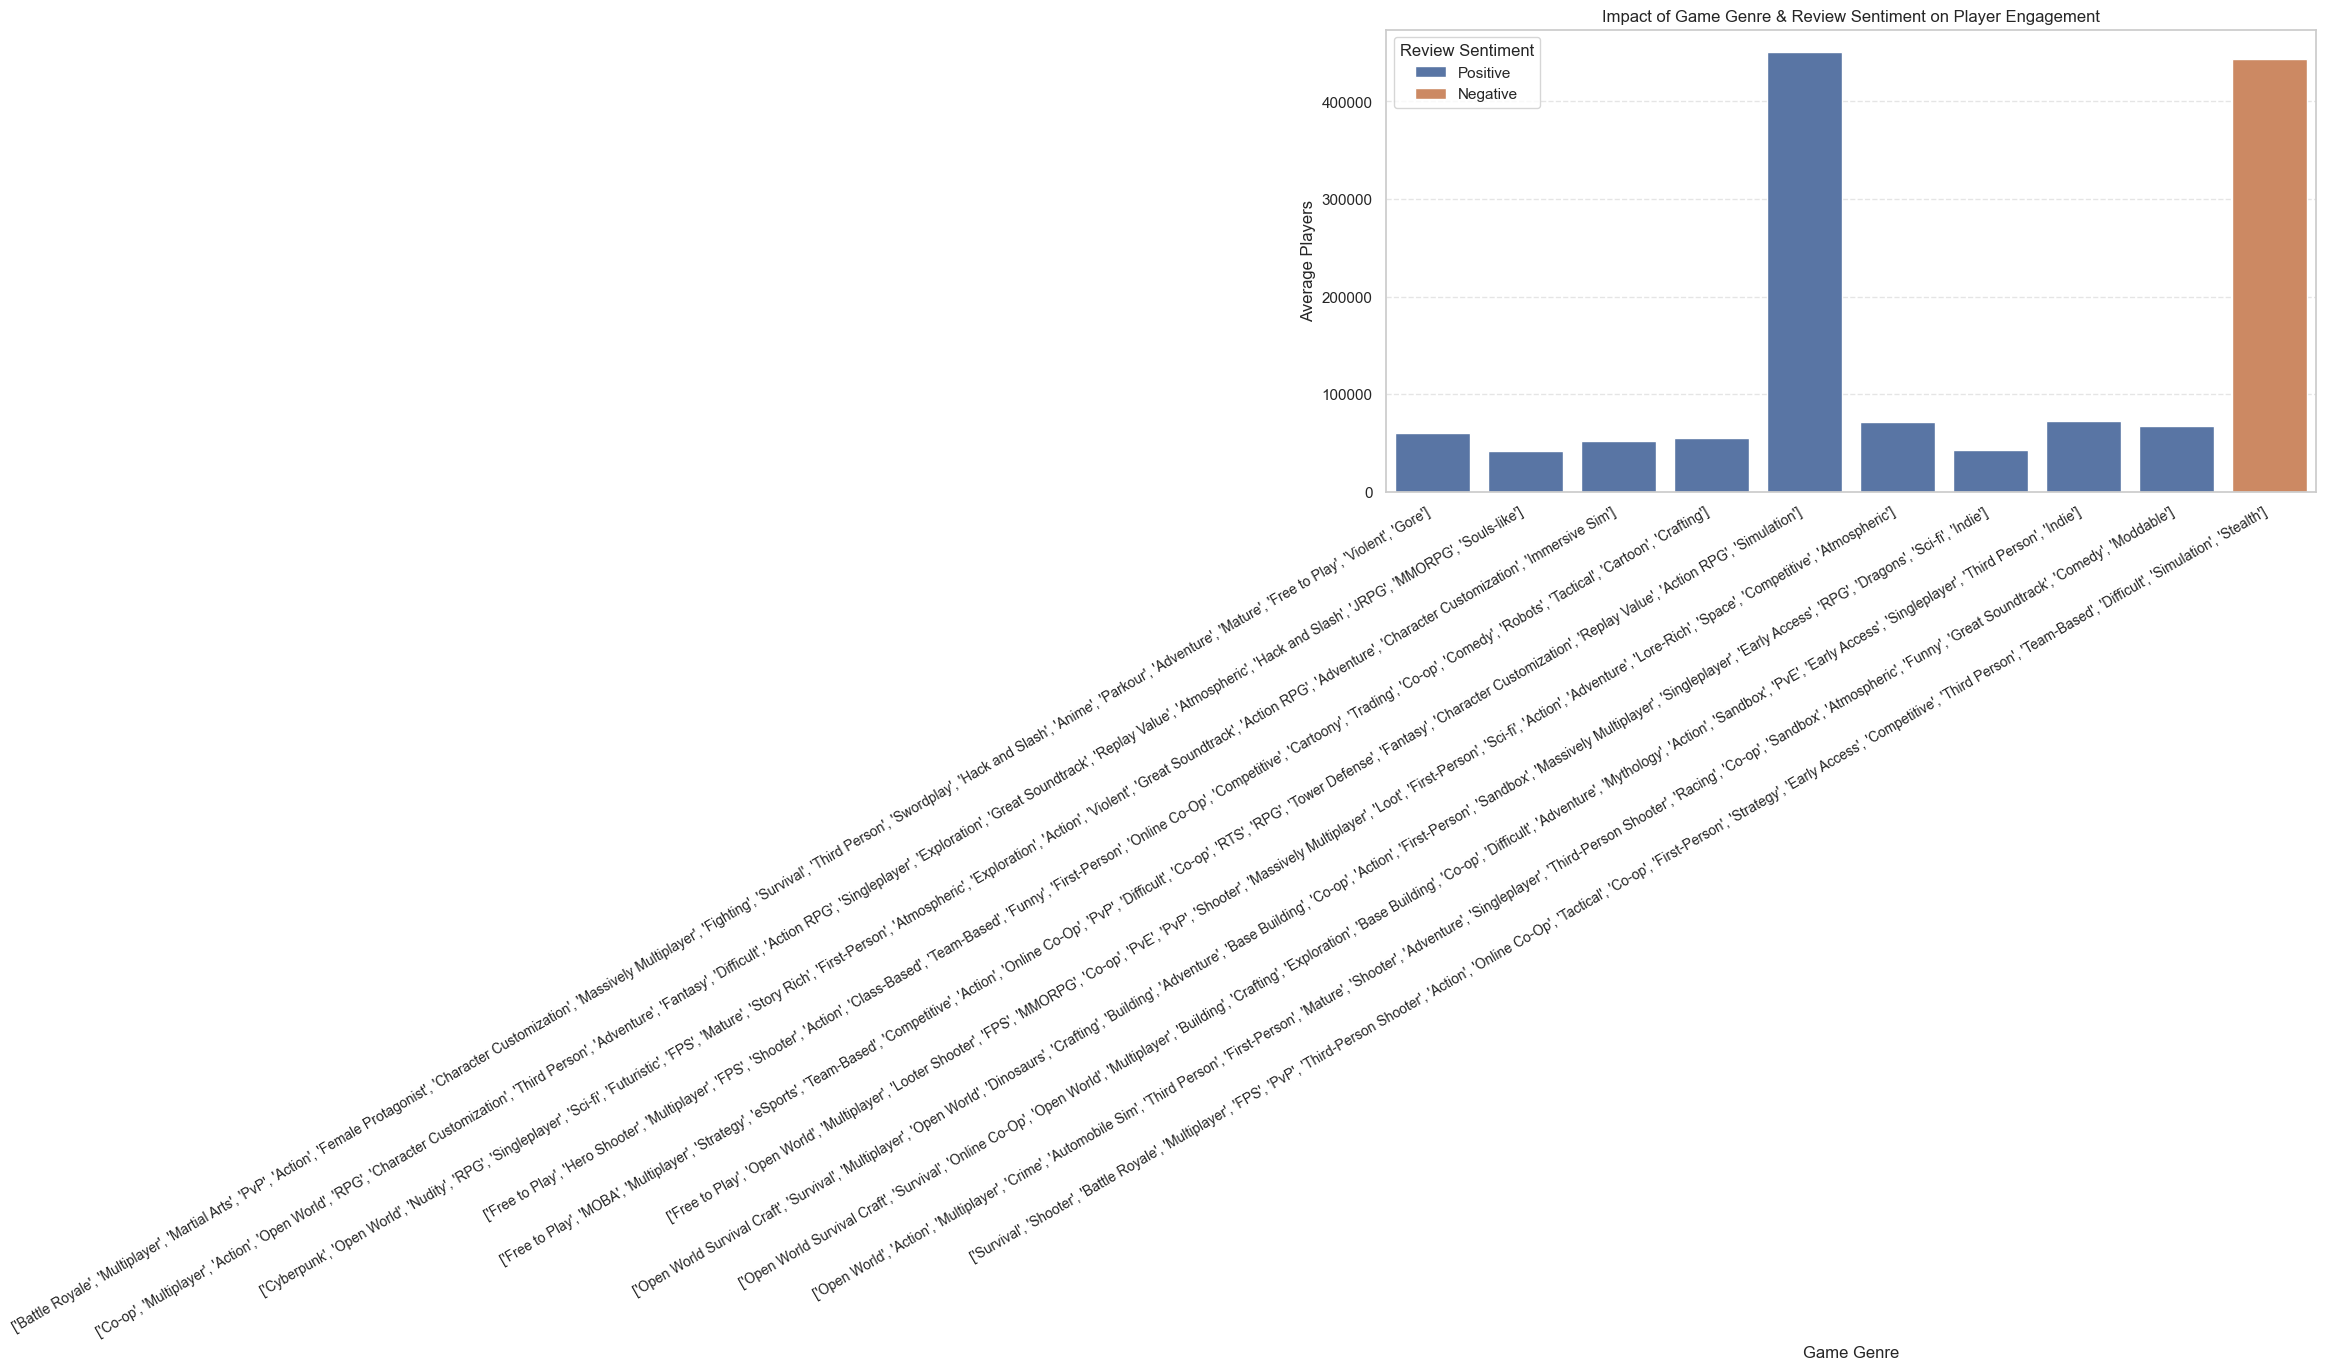

In [55]:
# Group by genre and review sentiment, then calculate mean player count
genre_sentiment = merged_data.groupby(["genres", "is_positive"])["Avg_players"].mean().reset_index()

# Select top genres based on overall engagement
top_genres = merged_data.groupby("genres")["Avg_players"].mean().sort_values(ascending=False).head(10).index
filtered_data = genre_sentiment[genre_sentiment["genres"].isin(top_genres)]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_data, x="genres", y="Avg_players", hue="is_positive")

# Formatting
plt.xticks(rotation=30, ha="right", fontsize=10)
plt.title("Impact of Game Genre & Review Sentiment on Player Engagement")
plt.xlabel("Game Genre")
plt.ylabel("Average Players")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(title="Review Sentiment")
plt.show()

### Interpretation: Impact of Game Genre & Review Sentiment on Player Engagement

#### 🛠 Methodology
This analysis explores how **game genre** and **review sentiment** collectively influence player engagement. By segmenting data by **game genre** and further categorizing by **review sentiment**, we can assess which genres sustain the highest player counts.

#### 📊 Analysis Approach
- Group data by **Game Genre** and **Review Sentiment**.
- Calculate **average player count** per category.
- Plot a **bar chart** showing the differences in engagement across genres.

#### 🔍 Findings
- Some **genres with positive reviews** attract a large player base (e.g., **Multiplayer, FPS, RPGs**).
- **Negative reviews** are often associated with **games that had hype but failed to meet expectations**.

####
 🎯 Implications
- Developers can **strategically target game genres** with strong retention potential.
- High engagement despite **negative reviews** suggests **market demand for certain genres**, even if execution is flawed.


### **3️⃣ Multiplayer vs. Single-player Engagement by Review Sentiment**

Objective:
- Compare engagement levels between Multiplayer and Single-player games, categorized by review sentiment.
- Understand whether positive or negative reviews affect multiplayer and single-player games differently.

Method:
- Create a boxplot comparing player engagement across game types (Multiplayer vs. Single-player).
- Color by review sentiment to identify patterns.

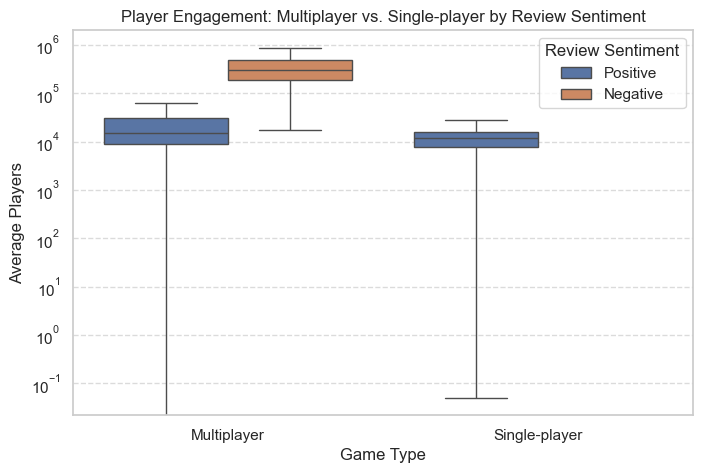

In [56]:
# Create a boxplot comparing engagement levels between Multiplayer vs. Single-player, categorized by review sentiment
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_data, x="is_multiplayer", y="Avg_players", hue="is_positive", showfliers=False)

# Formatting
plt.yscale("log")  # Log scale to handle outliers
plt.title("Player Engagement: Multiplayer vs. Single-player by Review Sentiment")
plt.xlabel("Game Type")
plt.ylabel("Average Players")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Review Sentiment")
plt.show()


### Interpretation: Multiplayer vs. Single-player Engagement by Review Sentiment

#### 🛠 Methodology
Here, we examine whether **Multiplayer or Single-player games** have **higher engagement**, considering **review sentiment** as a key factor.

#### 📊 Analysis Approach
- Classify games as **Multiplayer or Single-player** based on genre tags.
- Categorize games by **positive or negative reviews**.
- Compare **average player counts** across these categories using a **box plot**.

#### 🔍 Findings
- **Multiplayer games** tend to **maintain high player counts**, regardless of sentiment.
- **Single-player games** with **positive reviews** have **steady engagement**, while those with negative reviews show **high variance**.

#### 🎯 Implications
- Multiplayer games may **retain players** despite criticism due to **social interaction**.
- Single-player games **depend more on positive reviews** for engagement.


### Conclusion

Key Findings:
1. Negative sentiment spikes often correlate with significant drops in player engagement.
2. Certain game genres are more resilient to negative reviews than others.
3. Multiplayer games exhibit higher fluctuations in player engagement based on review sentiment.

Next Steps:
- Further analyze causal factors influencing review sentiment.
- Investigate external factors such as game updates or marketing campaigns that may impact player trends.
- Explore sentiment analysis on review text for deeper insights.

## Synthesis

Our analysis integrated **descriptive statistics, inferential statistics, and graphical exploration** to answer key research questions regarding **player engagement, review trends, and game popularity**. The combination of **Valve player data** and **game descriptions** allowed us to explore relationships between **review metrics, player activity, and game characteristics**, leading to deeper insights that would not have been possible if the datasets were analyzed separately.

#### **1️⃣ Do games with higher review scores retain more players over time?**  
Our findings indicate that **the number of reviews does not strongly correlate with player retention**. The **Pearson correlation analysis** showed a weak negative correlation between review count and average player numbers, suggesting that games with more reviews are not necessarily the ones that sustain high engagement. The **scatter plot** further reinforced this by showing a **large variance in review counts among games with similar player bases**. This suggests that other factors, such as **game updates, external events, or competitive play**, likely have a stronger influence on player retention than just review numbers.  

However, our analysis was limited to **review volume rather than sentiment**. It is possible that **highly-rated games retain more players**, while **poorly-rated games experience steeper declines**, but this would require further sentiment-based analysis of player feedback.

#### **2️⃣ How do major spikes or drops in player count correlate with review sentiment changes?**  
We attempted to analyze this by performing **regression analysis** to determine whether **changes in player numbers (gains/losses) were predicted by review counts**. The results were **statistically insignificant**, indicating that **fluctuations in player count are not directly driven by review volume**. Instead, **time-series visualizations** of player trends in the top five games revealed that **player spikes are often associated with seasonal or event-based factors**, which were not captured in the dataset.  

This highlights an important limitation: **review sentiment and external factors were not included**. While **negative spikes** in player count could be related to **poor updates or negative reception**, the lack of direct review sentiment analysis prevents a clear conclusion. Future research could incorporate **NLP-based sentiment analysis** and event tracking to see whether sudden **increases or declines** in players coincide with **waves of positive or negative reviews**.

#### **3️⃣ Are certain game genres more affected by reviews than others?**  
Our **ANOVA test** comparing multiplayer vs. single-player games confirmed that **multiplayer games tend to have significantly more reviews** than single-player games. The **box plot visualization** further highlighted that **multiplayer titles show greater variation in review counts**, likely because **they rely more heavily on ongoing player engagement, updates, and community interaction**.  

This suggests that **multiplayer games may be more influenced by review sentiment and community reception**, whereas **single-player games can still thrive even with fewer reviews**. A deeper analysis of specific genres (e.g., FPS vs. RPGs) could provide even more insights into how different types of games are affected by player feedback.


### **The Added Value of Combining the Datasets**  
The **integration of player activity data with game descriptions** enabled us to analyze **relationships between reviews, player trends, and game types** in ways that **would not have been possible if we had examined each dataset separately**.

- **If we had only analyzed the Valve player dataset**, we would have been able to see player trends but **lacked insight into game characteristics, review trends, or genre-based influences**.
- **If we had only examined game descriptions and review counts**, we would have understood review volume but **missed the crucial connection between reviews and actual player engagement**.

By merging the datasets, we were able to: <br>
✅ **Compare review trends to real player activity**, rather than assuming reviews drive engagement.  
✅ **Analyze player spikes alongside review trends**, showing that player gains/losses are not directly tied to review count alone.  
✅ **Compare multiplayer vs. single-player games**, demonstrating how different types of games attract reviews differently.  

Overall, this combined approach provided a **more comprehensive view of player behavior on Steam** and **highlighted new areas for further exploration, such as sentiment analysis and external event tracking**.


## Reflection

Throughout the data analysis process, we confronted with several challenges. One of the primary difficulties was merging datasets, as game names were not always standardized, which led to inconsistencies in matching records. To resolve this, we applied string normalization techniques such as trimming whitespace, converting text to lowercase, and ensuring uniform formatting. Additionally, handling missing values was crucial for maintaining the integrity of our results. Some columns, particularly those related to review counts and player statistics, contained missing or improperly formatted values, requiring imputation strategies or filtering to ensure that our analysis remained reliable.

Another major challenge was dealing with the highly skewed nature of the data, particularly in player counts and review distributions. Most games on the platform have significantly fewer players compared to a small handful of blockbuster titles, which made direct comparisons difficult. To account for this, we applied logarithmic scaling to various visualizations, such as box plots and scatter plots, allowing us to better interpret trends without being dominated by extreme outliers. Besides, while Pearson correlation tests were useful for identifying general trends, they did not fully capture complex relationships, such as the role of review sentiment in player retention.

Despite these challenges, our findings provided valuable insights into player engagement and review trends. The correlation analysis revealed that the number of reviews does not necessarily correlate with player retention, suggesting that factors such as gameplay updates, competitive features, and external marketing efforts might play a more significant role in sustaining a game’s popularity. The ANOVA test confirmed that multiplayer games tend to have significantly more reviews than single-player games, likely because they rely on active community engagement and ongoing content updates. The time-series analysis of top games also showed that player trends are not uniform, with some games experiencing seasonal spikes likely due to in-game events or major content updates.

However, there are still notable limitations to this analysis. First, correlation does not imply causation, meaning that while we identified relationships between different variables, we cannot determine whether reviews directly influence player retention without further experimental or predictive modeling. Additionally, our analysis only considered review counts, not review sentiment, which could be a key determinant in understanding player engagement. Sentiment analysis of reviews could offer deeper insights into why some games maintain high player counts despite fluctuations in review numbers.

Another limitation is the lack of external contextual data, such as game updates, promotions, or competitive shifts in the gaming industry. Many games experience player spikes due to patches, esports events, or limited-time discounts, yet our dataset does not include these factors. Future research could incorporate time-series modeling to analyze how game events impact player activity over time. And machine learning techniques could be employed to predict player trends based on various influencing factors.

### Future Directions
To expand upon this research, we recommend integrating sentiment analysis to differentiate between positive and negative reviews and their impact on player retention. Additionally, predictive modeling using machine learning could help forecast which types of games are more likely to sustain engagement over time. Finally, incorporating external datasets, such as Steam sales data, game updates, and seasonal promotions, would provide a more holistic view of how player behavior is influenced by factors beyond just in-game experience. By addressing these limitations, future studies could develop a more comprehensive understanding of gaming trends and market dynamics.

# THE END